## Logistic Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

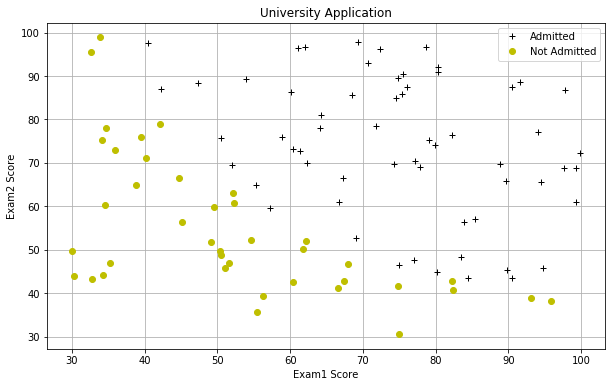

In [18]:
def data_loading(file_name):
    data=np.loadtxt(file_name,delimiter=',',unpack=True)
    X=np.transpose(data[:-1]) # [:-1] all except for the last one
    X=np.insert(X,0,1,axis=1)
    y=np.transpose(data[-1:]) # only the last column
    return X,y

[X,y]=data_loading('ex2data1.txt')

# data visualization
pos = [X[i] for i in range(X.shape[0]) if y[i]==1]
neg = [X[i] for i in range(X.shape[0]) if y[i]==0]
exam1_p = [x[1] for x in pos]
exam2_p = [x[2] for x in pos]
exam1_n = [x[1] for x in neg]
exam2_n = [x[2] for x in neg]

plt.figure(figsize=(10,6))
plt.plot(exam1_p,exam2_p,'k+',label='Admitted')
plt.plot(exam1_n,exam2_n,'yo',label='Not Admitted')
plt.grid(True)
plt.title('University Application')
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend()
plt.show()

### Implementation

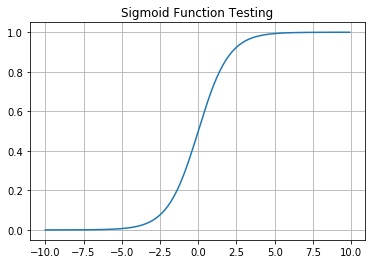

In [3]:
from scipy.special import expit # vectorized sigmoid function
# example 
test_x = np.arange(-10,10,0.1)
plt.plot(test_x,expit(test_x))
plt.title('Sigmoid Function Testing')
plt.grid(True)
plt.show()

#### Hypothesis function

$$
h _ { \theta } ( x ) = g \left( \theta ^ { T } x \right)
$$

$$
g ( z ) = \frac { 1 } { 1 + e ^ { - z } }
$$

#### Cost function 

$$
J ( \theta ) = \frac { 1 } { m } \sum _ { i = 1 } ^ { m } \left[ - y ^ { ( i ) } \log \left( h _ { \theta } \left( x ^ { ( i ) } \right) \right) - \left( 1 - y ^ { ( i ) } \right) \log \left( 1 - h _ { \theta } \left( x ^ { ( i ) } \right) \right) \right]
$$

In [4]:
# hypothesis function
def h(theta,X):
    return expit(np.dot(X,theta))

# cost function (without regularization)
def compute_cost(ini_theta,X,y):
    m = len(y)
    temp1 = np.dot(-y.T,np.log(h(ini_theta,X)))
    temp2 = np.dot((1-y).T,np.log((1-h(ini_theta,X))))
    return 1./m * np.sum(temp1-temp2)

# test
ini_theta=np.zeros((X.shape[1],1))
print(compute_cost(ini_theta,X,y))

0.69314718056


### Learning parameters using fmin

In [5]:
from scipy import optimize # finding the theta without using gradient loop

def optimize_theta(ini_theta,X,y):
    optimized = optimize.fmin(compute_cost,x0=ini_theta,args=(X,y),maxiter=400,full_output=True)
    return optimized

# test
result = optimize_theta(ini_theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [6]:
result 
# the first one is the optimized theta
# the second one is the optimized function value 
# the third one is the number of iteration completed 
# the forth one is the number of the function called

(array([-25.16130062,   0.20623142,   0.20147143]),
 0.2034977015902151,
 157,
 287,
 0)

### Evaluating logistic regression

#### Decision boundary

In [7]:
# decision boundary occurs when h = 0, or when sum(theta[i]x[i]) = 0
# theta0 + theta1*x1 + theta2*x2 =0 
# so x2 = -1/theta2 * (theta0 + theta1*x1)

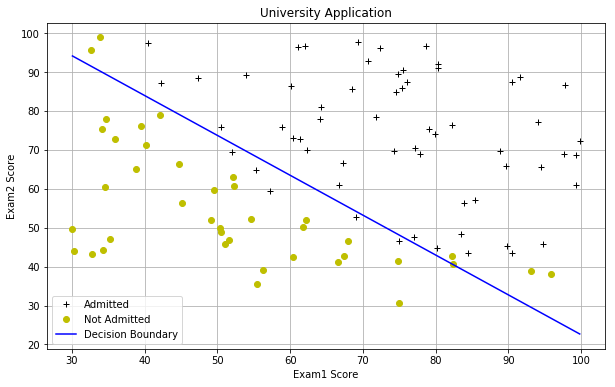

In [8]:
theta = result[0]
boundary_x = np.array([np.min(X[:,1]),np.max(X[:,1])])
boundary_y = -1./theta[2]*(theta[0]+theta[1]*boundary_x)

plt.figure(figsize=(10,6))
plt.plot(exam1_p,exam2_p,'k+',label='Admitted')
plt.plot(exam1_n,exam2_n,'yo',label='Not Admitted')
plt.plot(boundary_x,boundary_y,'b-',label='Decision Boundary')
plt.grid(True)
plt.title('University Application')
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend()
plt.show()

In [9]:
# prediction
# exam 1 is 45 and exam 2 is 85
# the expected probability is 0.776
print(h(theta,np.array([1,45.,85.])))

0.776291590411


In [10]:
def predict(ini_theta,X): # produce 1 or 0 given a dataset and a learned parameter
    return h(ini_theta,X) >= 0.5

pos_correct = np.sum(predict(theta,pos)) # correct if it is 1
neg_correct = np.sum(np.invert(predict(theta,neg)))  # correct if it is 0
correct_percentage = (pos_correct+neg_correct)/(len(pos)+len(neg))
print('Percentage of correct prediction: %f' % correct_percentage)


Percentage of correct prediction: 0.890000


### Regularized logistic regression

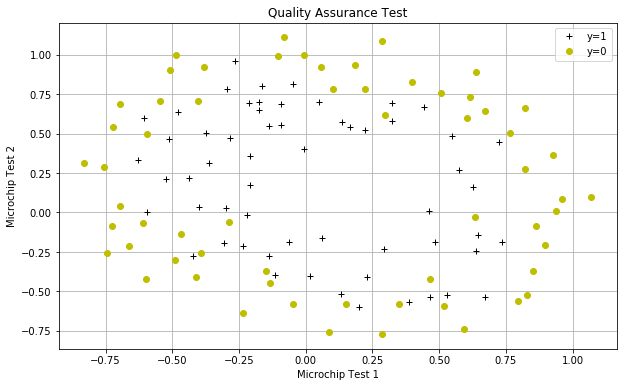

In [36]:
[X,y]=data_loading('ex2data2.txt')

def data_visualization(X,y):

    pos = [X[i] for i in range(X.shape[0]) if y[i]==1]
    neg = [X[i] for i in range(X.shape[0]) if y[i]==0]
    test1_p = [x[1] for x in pos]
    test2_p = [x[2] for x in pos]
    test1_n = [x[1] for x in neg]
    test2_n = [x[2] for x in neg]

    plt.plot(test1_p,test2_p,'k+',label='y=1')
    plt.plot(test1_n,test2_n,'yo',label='y=0')
    plt.grid(True)
    plt.title('Quality Assurance Test')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()

plt.figure(figsize=(10,6))
data_visualization(X,y)
plt.show()

#### Feature mapping 

$$
\operatorname { mapFeature } ( x ) = \left[ \begin{array} { c } { 1 } \\ { x _ { 1 } } \\ { x _ { 2 } } \\ { x _ { 1 } ^ { 2 } } \\ { x _ { 1 } x _ { 2 } } \\ { x _ { 2 } ^ { 3 } } \\ { x _ { 1 } ^ { 3 } } \\ { \vdots } \\ { x _ { 1 } x _ { 2 } ^ { 5 } } \\ { x _ { 1 } x _ { 2 } ^ { 5 } } \\ { x _ { 2 } ^ { 6 } } \end{array} \right]
$$

In [37]:
def map_feature(x1,x2):
    degrees = 6
    output = np.ones((x1.shape[0],1))
    
    for i in range(1,degrees+1):
        for j in range(0,i+1):
            term1 = x1 ** (i-j)
            term2 = x2 ** j
            term = (term1 * term2).reshape(term1.shape[0],1)
            output = np.hstack((output, term)) # horizontal stack
    return output

mapped_X = map_feature(X[:,1],X[:,2])

### Cost function and grdient with regularization

#### Cost function

$$
J ( \theta ) = \frac { 1 } { m } \sum _ { i = 1 } ^ { m } \left[ - y ^ { ( i ) } \log \left( h _ { \theta } \left( x ^ { ( i ) } \right) \right) - \left( 1 - y ^ { ( i ) } \right) \log \left( 1 - h _ { \theta } \left( x ^ { ( i ) } \right) \right) \right] + \frac { \lambda } { 2 m } \sum _ { j = 1 } ^ { n } \theta _ { j } ^ { 2 }
$$

#### Gradient

$$
\frac { \partial J ( \theta ) } { \partial \theta _ { j } } = \left( \frac { 1 } { m } \sum _ { i = 1 } ^ { m } \left( h _ { \theta } \left( x ^ { ( i ) } \right) - y ^ { ( i ) } \right) x _ { j } ^ { ( i ) } \right) + \frac { \lambda } { m } \theta _ { j } \quad \text { for } j \geq 1
$$

In [39]:
# cost function (with regularization)
def compute_cost_regularization(ini_theta,X,y,lambda_reg):
    m = len(y)
    temp1 = np.dot(-y.T,np.log(h(ini_theta,X)))
    temp2 = np.dot((1-y).T,np.log((1-h(ini_theta,X))))
    regularization = lambda_reg/(2*m) * np.sum(np.dot(ini_theta[1:].T,ini_theta[1:]))
    return 1./m * np.sum(temp1-temp2) + regularization

# optimization
# fmin was converging after max iteration
# Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm is an iterative method for solving unconstrained nonlinear optimization problems
def optimize_theta_regularization(ini_theta,X,y,lambda_reg):
    optimized = optimize.fmin_bfgs(compute_cost_regularization,x0=ini_theta,args=(X,y,lambda_reg),maxiter=700,full_output=True,disp=False)
    return optimized

lambda_reg = 0
ini_theta = np.zeros((mapped_X.shape[1],1))
result = optimize_theta_regularization(ini_theta,mapped_X,y,lambda_reg)

In [14]:
result #28 dims

(array([   32.46789802,    40.57237142,    64.20599112,  -317.57654514,
         -183.81879224,  -170.38542707,  -271.09465493,  -572.64650009,
         -474.97248793,  -306.84579391,  1009.52315783,  1171.24163058,
         1628.98825907,   839.73481826,   406.48484316,   431.05751845,
         1133.67129696,  1688.05305353,  1802.96323155,  1067.83524419,
          439.288746  , -1054.29854947, -1859.44390084, -3194.72037065,
        -3233.84183917, -3052.48305703, -1463.17856062,  -482.95744285]),
 0.22473982781945265,
 array([ -8.86432827e-06,  -5.99399209e-06,  -3.93390656e-06,
         -2.01724470e-06,  -3.26335430e-06,  -2.66358256e-06,
         -3.72529030e-07,   2.55182385e-06,   1.27218664e-06,
          1.86264515e-08,  -3.83146107e-06,   5.26383519e-06,
          1.90734863e-06,   5.04031777e-06,  -1.67451799e-06,
         -6.35907054e-06,  -4.62867320e-06,  -6.31064177e-06,
         -6.38142228e-06,  -3.39373946e-06,  -4.68641520e-06,
          2.16066837e-06,  -8.81031156

In [24]:
theta = result[0]
min_cost = result[1]

#### Decision boundary

In [53]:
'''
plot the non-linear decision boundary by computing the classifier's 
predictions on evenly spaced grid and then drew a contour plot of 
where the predictions change from y=0 to y=1
''' 
def decision_boundary(theta,X,y,lambda_reg):
    
    result = optimize_theta_regularization(ini_theta,mapped_X,y,lambda_reg)
    theta = result[0]
    x_vals = np.linspace(-1,1.5,50)
    y_vals = np.linspace(-1,1.5,50)
    grid = np.zeros((len(x_vals),len(y_vals)))

    for i in range(len(x_vals)):
        for j in range(len(y_vals)):
            mappedfeature = map_feature(np.array([x_vals[i]]),np.array([y_vals[j]])) # change the format to X 
            grid[i][j] = np.dot(theta,mappedfeature.T)
    grid = grid.transpose()  # NumPy stores arrays in [row, column] format whereas this data set assumes [column, row]
    
    x_vals,y_vals=np.meshgrid(x_vals,y_vals)
    contour = plt.contour(x_vals,y_vals,grid,[0])
    plt.clabel(contour,inline=1,fontsize=16,fmt={0:'Lambda ='+ str(lambda_reg)}) # use a dict to name
    plt.title('Decision Boundary')

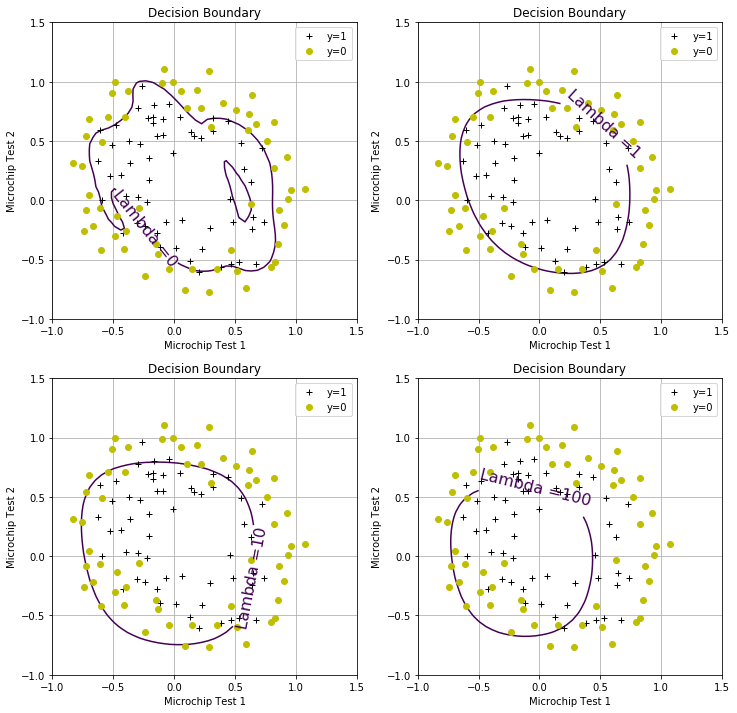

In [54]:
plt.figure(figsize=(12,12))
plt.subplot(221)
data_visualization(X,y)
decision_boundary(theta,X,y,0)

plt.subplot(222)
data_visualization(X,y)
decision_boundary(theta,X,y,1)

plt.subplot(223)
data_visualization(X,y)
decision_boundary(theta,X,y,10)

plt.subplot(224)
data_visualization(X,y)
decision_boundary(theta,X,y,100)